# TSF Task#2- To Explore Supervised Machine Learning
Objective:- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data can be found at "http://bit.ly/w-data"

Problem Statement:- What will be predicted score if a student study for 9.25 hrs in a day?

### Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
dataset=pd.read_csv(url)

dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
dataset.isnull().any()

Hours     False
Scores    False
dtype: bool

### Plotting the distribution of scores

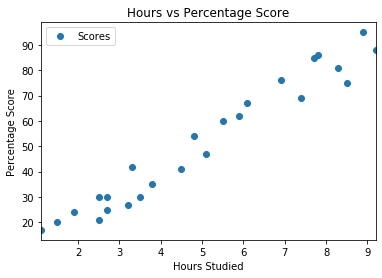

In [5]:
x=('Hours')
y=('Scores')
dataset.plot(x, y, style='o')
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph , we can clearly see that there is a positive linear regression between the number of hours studied and percentage score.

### Splitting  the data into the training set and test set using Scikit-Learn's built-in train_test_split() method.

In [6]:
x=dataset.iloc[:,:-1].values  
y=dataset.iloc[:,1].values  

In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Fitting Simple Linear Regression to the Training  set

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Visualising the Training set results

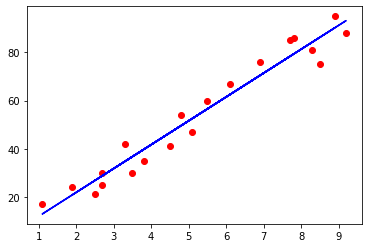

In [23]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.show()

### Predicting the Test set results

In [24]:
y_pred =regressor.predict(x_test)

### Comparing Actual Value vs Predicted Value

In [31]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting Score if a student study for 9.25 hrs in a day

In [32]:
Hours_Studied= 9.25
Predicited_Score= regressor.predict([[Hours_Studied]])
print("No of Hours = {}".format(Hours_Studied))
print("Predicted Score = {}".format(Predicited_Score))

No of Hours = 9.25
Predicted Score = [93.69173249]


### Evaluating the model
The Final steps is to evaluate the performance of algorithm.

In [33]:
import sklearn.metrics as metrics
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE):  21.598769307217406


In [34]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE):  4.183859899002975


In [35]:
print("Coefficient of Determination (R2): ",metrics.r2_score(y_test, y_pred))

Coefficient of Determination (R2):  0.9454906892105355


In [36]:
print("Root Mean Squared Error (RMSE): ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE):  4.647447612100367
